# <span style="color:Red">Risk Parity</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import minimize

In [2]:
retornos = pd.read_csv('data/returns_selected.csv',index_col=0)
retornos.index.names = ['Date']
retornos.index = pd.to_datetime(retornos.index)

In [3]:
retornos.head()

,LU0272423913,LU0474536744,LU0147408487,LU1160359102,LU1160358633,IE0004866889,LU0966156712,LU1048657123,LU0966156399,IE00B03HCY54,...,IE00BLY1N519,IE00BLY27S52,LU0963986467,LU0858297186,IE00BLWF5D72,IE00BLWF5F96,IE00BHCR9339,IE00BCRY5R01,LU0858297772,LU0963987275
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,-0.014990,-0.002037,-0.015796,-0.024757,-0.024781,-0.004787,-0.012550,-0.012539,-0.012622,0.0,...,-0.001022,-0.000932,0.000582,0.000619,-0.001010,-0.001013,0.000707,0.000683,0.000507,0.000606
2016-01-07,-0.022914,-0.040227,-0.022918,-0.037041,-0.037004,-0.051189,-0.025975,-0.025978,-0.025975,0.0,...,-0.001023,-0.001222,0.001066,-0.001134,-0.002022,-0.001014,-0.001566,-0.001588,-0.001014,0.001110
2016-01-08,-0.011099,0.008457,-0.003766,-0.017866,-0.017866,0.006274,-0.014878,-0.014899,-0.014929,0.0,...,-0.001024,-0.000833,-0.001260,-0.001032,0.000000,0.000000,0.000868,0.000812,-0.001015,-0.001110
2016-01-11,-0.013483,-0.034265,-0.019048,0.000870,0.000879,-0.038846,-0.012839,-0.012888,-0.012988,0.0,...,0.001024,0.000118,0.000679,-0.000930,0.000000,0.000000,-0.001010,-0.001026,-0.001016,0.000606
2016-01-12,-0.001132,0.004348,0.005753,0.005698,0.005757,0.005135,0.003064,0.003002,0.002993,0.0,...,0.000000,-0.000168,-0.001261,-0.001241,0.000000,0.000000,-0.000453,-0.000485,-0.001221,-0.001111


In [4]:
retornos_ff = retornos.copy()

In [5]:
retornos = pd.read_csv('data/returns_selected.csv',index_col=0)
retornos.index.names = ['Date']
retornos.index = pd.to_datetime(retornos.index)

retornos.head()

,LU0272423913,LU0474536744,LU0147408487,LU1160359102,LU1160358633,IE0004866889,LU0966156712,LU1048657123,LU0966156399,IE00B03HCY54,...,IE00BLY1N519,IE00BLY27S52,LU0963986467,LU0858297186,IE00BLWF5D72,IE00BLWF5F96,IE00BHCR9339,IE00BCRY5R01,LU0858297772,LU0963987275
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,-0.014990,-0.002037,-0.015796,-0.024757,-0.024781,-0.004787,-0.012550,-0.012539,-0.012622,0.0,...,-0.001022,-0.000932,0.000582,0.000619,-0.001010,-0.001013,0.000707,0.000683,0.000507,0.000606
2016-01-07,-0.022914,-0.040227,-0.022918,-0.037041,-0.037004,-0.051189,-0.025975,-0.025978,-0.025975,0.0,...,-0.001023,-0.001222,0.001066,-0.001134,-0.002022,-0.001014,-0.001566,-0.001588,-0.001014,0.001110
2016-01-08,-0.011099,0.008457,-0.003766,-0.017866,-0.017866,0.006274,-0.014878,-0.014899,-0.014929,0.0,...,-0.001024,-0.000833,-0.001260,-0.001032,0.000000,0.000000,0.000868,0.000812,-0.001015,-0.001110
2016-01-11,-0.013483,-0.034265,-0.019048,0.000870,0.000879,-0.038846,-0.012839,-0.012888,-0.012988,0.0,...,0.001024,0.000118,0.000679,-0.000930,0.000000,0.000000,-0.001010,-0.001026,-0.001016,0.000606
2016-01-12,-0.001132,0.004348,0.005753,0.005698,0.005757,0.005135,0.003064,0.003002,0.002993,0.0,...,0.000000,-0.000168,-0.001261,-0.001241,0.000000,0.000000,-0.000453,-0.000485,-0.001221,-0.001111


In [6]:
retornos.head()

,LU0272423913,LU0474536744,LU0147408487,LU1160359102,LU1160358633,IE0004866889,LU0966156712,LU1048657123,LU0966156399,IE00B03HCY54,...,IE00BLY1N519,IE00BLY27S52,LU0963986467,LU0858297186,IE00BLWF5D72,IE00BLWF5F96,IE00BHCR9339,IE00BCRY5R01,LU0858297772,LU0963987275
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,-0.014990,-0.002037,-0.015796,-0.024757,-0.024781,-0.004787,-0.012550,-0.012539,-0.012622,0.0,...,-0.001022,-0.000932,0.000582,0.000619,-0.001010,-0.001013,0.000707,0.000683,0.000507,0.000606
2016-01-07,-0.022914,-0.040227,-0.022918,-0.037041,-0.037004,-0.051189,-0.025975,-0.025978,-0.025975,0.0,...,-0.001023,-0.001222,0.001066,-0.001134,-0.002022,-0.001014,-0.001566,-0.001588,-0.001014,0.001110
2016-01-08,-0.011099,0.008457,-0.003766,-0.017866,-0.017866,0.006274,-0.014878,-0.014899,-0.014929,0.0,...,-0.001024,-0.000833,-0.001260,-0.001032,0.000000,0.000000,0.000868,0.000812,-0.001015,-0.001110
2016-01-11,-0.013483,-0.034265,-0.019048,0.000870,0.000879,-0.038846,-0.012839,-0.012888,-0.012988,0.0,...,0.001024,0.000118,0.000679,-0.000930,0.000000,0.000000,-0.001010,-0.001026,-0.001016,0.000606
2016-01-12,-0.001132,0.004348,0.005753,0.005698,0.005757,0.005135,0.003064,0.003002,0.002993,0.0,...,0.000000,-0.000168,-0.001261,-0.001241,0.000000,0.000000,-0.000453,-0.000485,-0.001221,-0.001111


In [7]:
retornos_ff = retornos.copy()

## <span style="color:white">Risk Parity Model</span>

In [8]:
# Función que calcula la varianza de la cartera
def calculaVarCartera(w,cov):
    
    w = np.matrix(w)
    VarCartera = (w*cov*w.T)[0,0]
    return VarCartera

In [9]:
# Función que calcula la contribución al riesgo de los activos

def calculaRiskContribution(w,cov):

    w = np.matrix(w)
    sigma = np.sqrt(calculaVarCartera(w,cov))
    MRC = cov*w.T
    RC = np.multiply(MRC,w.T)/sigma

    return RC

In [10]:
# Función principal que define el problema a optimizar (minimizar)

def funcionObjetivo(w,pars):
    
    cov = pars[0]
    risk_budget = pars[1] 

    vola =  np.sqrt(calculaVarCartera(w,cov)) 

    risk_target = np.asmatrix(np.multiply(vola,risk_budget))

    asset_RC = calculaRiskContribution(w,cov)

    error = sum(np.square(asset_RC-risk_target.T))[0,0]*100000 
 
    return error

In [12]:

def restPesoTotal(w):
    """
    Restringimos a que la suma de los pesos sea 1. Para ello,
    esta función devuelve la suma -1
    - INPUTS:
        · w = vector de pesos de los activos
    - OUTPUTS:
        · errorSuma = (double) suma de los pesos menos 1 
    """
    errorSuma = np.sum(w)-1.0
    return errorSuma

def restPesoPositivo(w):
    return w

In [13]:
# Optimización

cov = retornos_ff.cov().values
risk_budget = [1/retornos_ff.shape[1]]*retornos_ff.shape[1]
w0 = [1/retornos_ff.shape[1]]*retornos_ff.shape[1]

cons = ({'type': 'eq', 'fun': restPesoTotal}, 
        {'type': 'ineq', 'fun': restPesoPositivo})

res = minimize(funcionObjetivo, w0, args=[cov,risk_budget], method='SLSQP', constraints=cons, options={'disp': False})
pesosRP = np.asmatrix(res.x)


In [14]:
pd.DataFrame(pesosRP.T, index=retornos_ff.columns, columns=['pesos'])

,pesos
LU0272423913,0.003865
LU0474536744,0.004388
LU0147408487,0.004125
LU1160359102,0.003647
LU1160358633,0.003599
IE0004866889,0.004958
LU0966156712,0.003663
LU1048657123,0.003645
LU0966156399,0.003643
IE00B03HCY54,0.003990


In [15]:
cov

array([[1.73776988e-04, 8.85213256e-05, 1.03870316e-04, ...,
        8.63958698e-06, 4.43053896e-06, 7.49865660e-06],
       [8.85213256e-05, 1.73775824e-04, 1.18198080e-04, ...,
        6.85087247e-06, 3.64285014e-06, 5.59638203e-06],
       [1.03870316e-04, 1.18198080e-04, 1.73751365e-04, ...,
        7.30661268e-06, 4.05479041e-06, 7.04838601e-06],
       ...,
       [8.63958698e-06, 6.85087247e-06, 7.30661268e-06, ...,
        2.25721791e-06, 6.80623299e-07, 1.61315048e-06],
       [4.43053896e-06, 3.64285014e-06, 4.05479041e-06, ...,
        6.80623299e-07, 2.25706532e-06, 7.86698130e-07],
       [7.49865660e-06, 5.59638203e-06, 7.04838601e-06, ...,
        1.61315048e-06, 7.86698130e-07, 2.25372127e-06]])

In [16]:
np.sqrt(calculaVarCartera(pesosRP,cov))

0.0012745093857705059

In [17]:
pesosRP.sum()

1.0

In [18]:
RiskContr = calculaRiskContribution(pesosRP,cov)
RiskContr

matrix([[3.17338251e-05],
        [3.21135786e-05],
        [3.14806671e-05],
        [3.13141162e-05],
        [3.09043310e-05],
        [3.22688044e-05],
        [3.07894542e-05],
        [3.06338314e-05],
        [3.05973219e-05],
        [3.09448651e-05],
        [3.11368897e-05],
        [3.13637462e-05],
        [3.20854026e-05],
        [3.21920302e-05],
        [3.23320098e-05],
        [3.12702309e-05],
        [3.14304207e-05],
        [3.22866522e-05],
        [3.13637496e-05],
        [3.11965832e-05],
        [3.37295410e-05],
        [1.87218284e-05],
        [3.25131168e-05],
        [3.25077402e-05],
        [3.36068684e-05],
        [3.36061616e-05],
        [3.30383782e-05],
        [3.25892716e-05],
        [3.26130351e-05],
        [3.03804550e-05],
        [3.48008087e-05],
        [3.28091100e-05],
        [3.25918546e-05],
        [3.38444969e-05],
        [3.49441752e-05],
        [3.49236084e-05],
        [3.06751879e-05],
        [3.06678059e-05],
        [3.3

In [19]:
(np.sqrt(pesosRP*cov*pesosRP.T)-RiskContr.sum())[0,0]

-4.336808689942018e-19

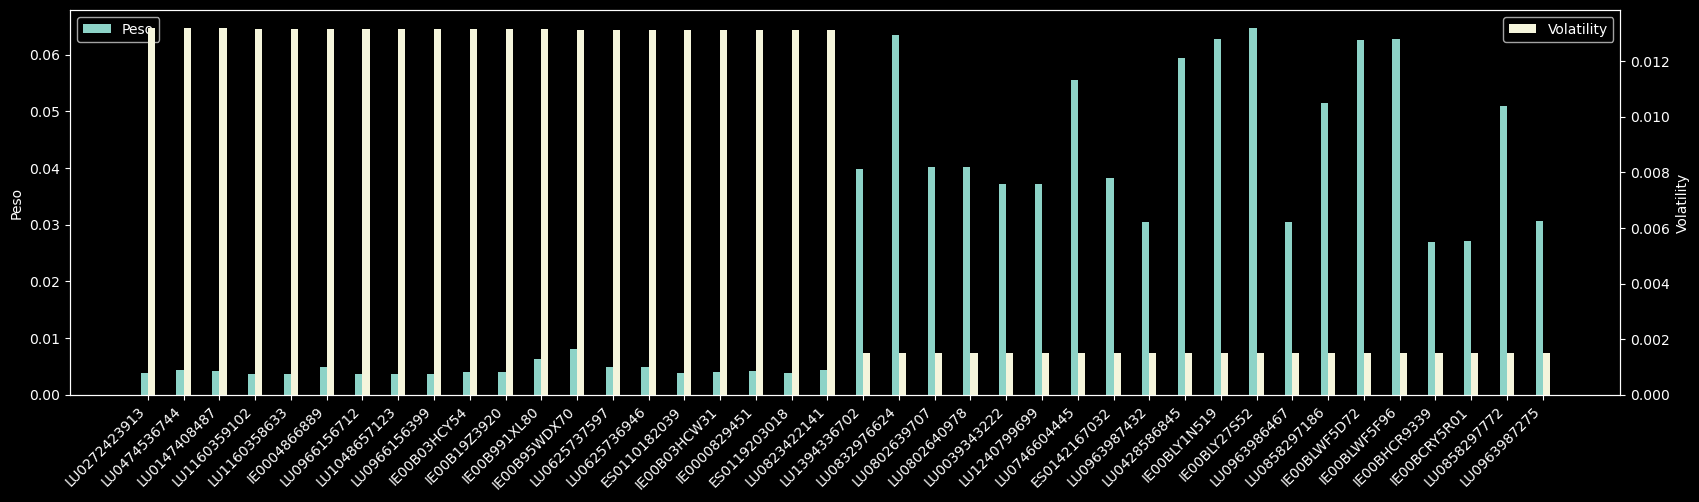

In [20]:
plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(20,5))

ax1.bar(x=np.arange(retornos_ff.shape[1])-0.1, height=np.array(pesosRP)[0], width=0.2, label='Peso')
ax1.set_xticks(np.arange(retornos_ff.shape[1]))
ax1.set_xticklabels(retornos_ff.columns, rotation=45, ha='right')
ax1.set_ylabel('Peso')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x=np.arange(retornos_ff.shape[1])+0.1, height=retornos_ff.std(), width=0.2, label='Volatility', color='beige')
ax2.set_ylabel('Volatility')
ax2.legend(loc='upper right')

plt.show()

<Axes: >

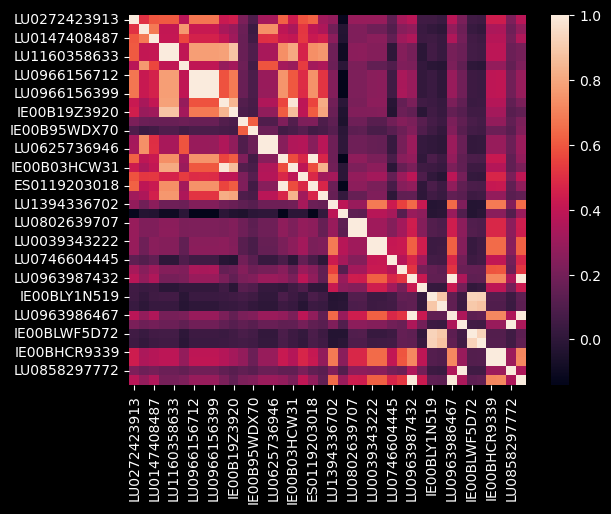

In [21]:
# Mapeo Correlación
sns.heatmap(retornos_ff.corr())

In [22]:
# Nos quedamos sólo con la diagonal de la matriz de varianzas-covarianzas

diagCov = np.diag(cov)
covMod = np.zeros(cov.shape)
np.fill_diagonal(covMod,diagCov)
covMod

array([[1.73776988e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.73775824e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.73751365e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.25721791e-06, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.25706532e-06, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.25372127e-06]])

In [23]:
risk_budget = [1/retornos_ff.shape[1]]*retornos_ff.shape[1]


w0 = [1/retornos_ff.shape[1]]*retornos_ff.shape[1]

cons = ({'type': 'eq', 'fun': restPesoTotal}, 
        {'type': 'ineq', 'fun': restPesoPositivo})


res = minimize(funcionObjetivo, w0, args=[covMod,risk_budget], method='SLSQP', constraints=cons, options={'disp': False})
pesosRPMod = np.asmatrix(res.x)

In [24]:
pd.DataFrame(pesosRPMod.T, index=retornos_ff.columns, columns=['pesosIVP'])

,pesosIVP
LU0272423913,0.005215
LU0474536744,0.005214
LU0147408487,0.005207
LU1160359102,0.005146
LU1160358633,0.005206
IE0004866889,0.005059
LU0966156712,0.005207
LU1048657123,0.005226
LU0966156399,0.005218
IE00B03HCY54,0.005213


In [25]:
calculaRiskContribution(pesosRPMod,covMod)

matrix([[1.10018330e-05],
        [1.10014014e-05],
        [1.09698244e-05],
        [1.06914863e-05],
        [1.09375777e-05],
        [1.03115431e-05],
        [1.09112915e-05],
        [1.09888910e-05],
        [1.09509432e-05],
        [1.09312750e-05],
        [1.08685559e-05],
        [1.08407830e-05],
        [1.07256456e-05],
        [1.07251048e-05],
        [1.07134916e-05],
        [1.07090362e-05],
        [1.07140258e-05],
        [1.07763235e-05],
        [1.07503488e-05],
        [1.06513779e-05],
        [1.06931188e-05],
        [1.06921311e-05],
        [1.06915695e-05],
        [1.06901404e-05],
        [1.06875968e-05],
        [1.06852265e-05],
        [1.06824303e-05],
        [1.06777663e-05],
        [1.06703927e-05],
        [1.06682274e-05],
        [1.06598248e-05],
        [1.06597884e-05],
        [1.06585117e-05],
        [1.06558975e-05],
        [1.06482358e-05],
        [1.06463014e-05],
        [1.06445371e-05],
        [1.06394409e-05],
        [1.0

In [26]:
calculaRiskContribution(pesosRPMod,cov)

matrix([[4.61880910e-05],
        [3.99948148e-05],
        [4.18816019e-05],
        [4.82863313e-05],
        [4.88428951e-05],
        [3.44455995e-05],
        [4.82754783e-05],
        [4.84423962e-05],
        [4.83395336e-05],
        [4.39582363e-05],
        [4.31455146e-05],
        [2.33888961e-05],
        [1.75619173e-05],
        [3.48539668e-05],
        [3.48403910e-05],
        [4.53617196e-05],
        [4.43915140e-05],
        [4.29366006e-05],
        [4.53946511e-05],
        [3.94934174e-05],
        [3.84348087e-05],
        [1.07947689e-05],
        [3.58850289e-05],
        [3.58752788e-05],
        [4.08564291e-05],
        [4.09367976e-05],
        [2.44730820e-05],
        [3.82078455e-05],
        [4.77187575e-05],
        [2.09694741e-05],
        [1.79345080e-05],
        [1.58902957e-05],
        [4.77834561e-05],
        [2.78812912e-05],
        [1.81109360e-05],
        [1.80667622e-05],
        [5.21684269e-05],
        [5.21784563e-05],
        [2.8

In [27]:
pd.concat([pd.DataFrame(pesosRPMod.T, index=retornos_ff.columns, columns=['pesosIVP']),pd.DataFrame(pesosRP.T, index=retornos_ff.columns, columns=['pesosRP'])], axis=1)

,pesosIVP,pesosRP
LU0272423913,0.005215,0.003865
LU0474536744,0.005214,0.004388
LU0147408487,0.005207,0.004125
LU1160359102,0.005146,0.003647
LU1160358633,0.005206,0.003599
IE0004866889,0.005059,0.004958
LU0966156712,0.005207,0.003663
LU1048657123,0.005226,0.003645
LU0966156399,0.005218,0.003643
IE00B03HCY54,0.005213,0.003990
